In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.express as px
import numpy as np

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler 

import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap

In [307]:
file_path = 'SmartFarmingCropYield.csv'

dataset = pd.read_csv(file_path)

# Análisis exploratorio de datos (EDA)

In [308]:
#Creamos copia del dataset original
df = dataset.copy()

#Renombramos las columnas para que no comiencen con un espacio
df.columns = df.columns.str.strip().str.replace(" ", "")

df

,tipoCultivo,humedadSuelo(%),pHSuelo,temperatura(°C),precipitacion(mm),humedad(%),horasLuzSolar,tipoRiego,tipoFertilizante,mlPesticida,diasTotales,rendimientoKg_hectarea,indiceNDVI,estadoEnfermedadesCultivo
0,Trigo,35.95,5.99,17.79,75.62,77.03,7.27,NaN,Organico,6.34,122,4408.07,0.63,Leve
1,Soja,19.74,7.24,30.18,89.91,61.13,5.67,Aspersor,Inorganico,9.60,112,5389.98,0.58,NaN
2,Trigo,29.32,7.16,27.37,265.43,68.87,8.23,Goteo,Mixto,15.26,144,2931.16,0.80,Leve
3,Maiz,17.33,6.03,33.73,212.01,70.46,5.03,Aspersor,Organico,25.80,134,4227.80,0.44,NaN
4,Soja,36.28,7.04,21.80,123.38,47.91,4.02,Manual,Mixto,39.29,145,4501.20,0.76,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,Maiz,32.14,7.44,21.49,286.61,84.20,5.58,Aspersor,Inorganico,45.43,93,4503.82,0.88,Leve
307,Trigo,28.81,7.46,30.56,245.13,45.32,8.47,NaN,Mixto,16.58,128,4203.51,0.65,Severo
308,Soja,34.22,6.75,17.46,256.23,45.14,5.78,NaN,Organico,5.05,104,3708.54,0.85,Severo
309,Soja,38.61,6.20,17.08,279.06,73.09,9.60,Goteo,Organico,43.78,131,2586.36,0.77,Severo


In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tipoCultivo                311 non-null    object 
 1   humedadSuelo(%)            311 non-null    float64
 2   pHSuelo                    311 non-null    float64
 3   temperatura(°C)            311 non-null    float64
 4   precipitacion(mm)          311 non-null    float64
 5   humedad(%)                 311 non-null    float64
 6   horasLuzSolar              311 non-null    float64
 7   tipoRiego                  220 non-null    object 
 8   tipoFertilizante           311 non-null    object 
 9   mlPesticida                311 non-null    float64
 10  diasTotales                311 non-null    int64  
 11  rendimientoKg_hectarea     311 non-null    float64
 12  indiceNDVI                 311 non-null    float64
 13  estadoEnfermedadesCultivo  228 non-null    object 

**Valores faltantes o duplicados**

In [310]:
df.duplicated().values.any()


False

In [311]:
df.isna().sum()

tipoCultivo                   0
humedadSuelo(%)               0
pHSuelo                       0
temperatura(°C)               0
precipitacion(mm)             0
humedad(%)                    0
horasLuzSolar                 0
tipoRiego                    91
tipoFertilizante              0
mlPesticida                   0
diasTotales                   0
rendimientoKg_hectarea        0
indiceNDVI                    0
estadoEnfermedadesCultivo    83
dtype: int64

In [312]:
df[df.isna().any(axis=1)]

,tipoCultivo,humedadSuelo(%),pHSuelo,temperatura(°C),precipitacion(mm),humedad(%),horasLuzSolar,tipoRiego,tipoFertilizante,mlPesticida,diasTotales,rendimientoKg_hectarea,indiceNDVI,estadoEnfermedadesCultivo
0,Trigo,35.95,5.99,17.79,75.62,77.03,7.27,NaN,Organico,6.34,122,4408.07,0.63,Leve
1,Soja,19.74,7.24,30.18,89.91,61.13,5.67,Aspersor,Inorganico,9.60,112,5389.98,0.58,NaN
3,Maiz,17.33,6.03,33.73,212.01,70.46,5.03,Aspersor,Organico,25.80,134,4227.80,0.44,NaN
4,Soja,36.28,7.04,21.80,123.38,47.91,4.02,Manual,Mixto,39.29,145,4501.20,0.76,NaN
8,Maiz,42.43,7.07,20.70,224.15,76.53,8.70,NaN,Organico,13.55,127,4942.95,0.65,Leve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,Soja,40.46,7.44,18.31,237.68,59.21,8.68,NaN,Mixto,17.22,100,4287.59,0.77,Severo
305,Soja,19.06,7.20,20.93,117.13,45.96,5.34,Aspersor,Inorganico,6.76,149,2531.89,0.79,NaN
307,Trigo,28.81,7.46,30.56,245.13,45.32,8.47,NaN,Mixto,16.58,128,4203.51,0.65,Severo
308,Soja,34.22,6.75,17.46,256.23,45.14,5.78,NaN,Organico,5.05,104,3708.54,0.85,Severo


In [313]:
df.dropna(inplace=True)

**Distrubuciones de las variables**

In [314]:
#Selección de columnas númericas
cols = ['humedadSuelo(%)', 'pHSuelo', 'temperatura(°C)','precipitacion(mm)', 'humedad(%)', 'horasLuzSolar', 
'mlPesticida', 'diasTotales', 'rendimientoKg_hectarea', 'indiceNDVI']

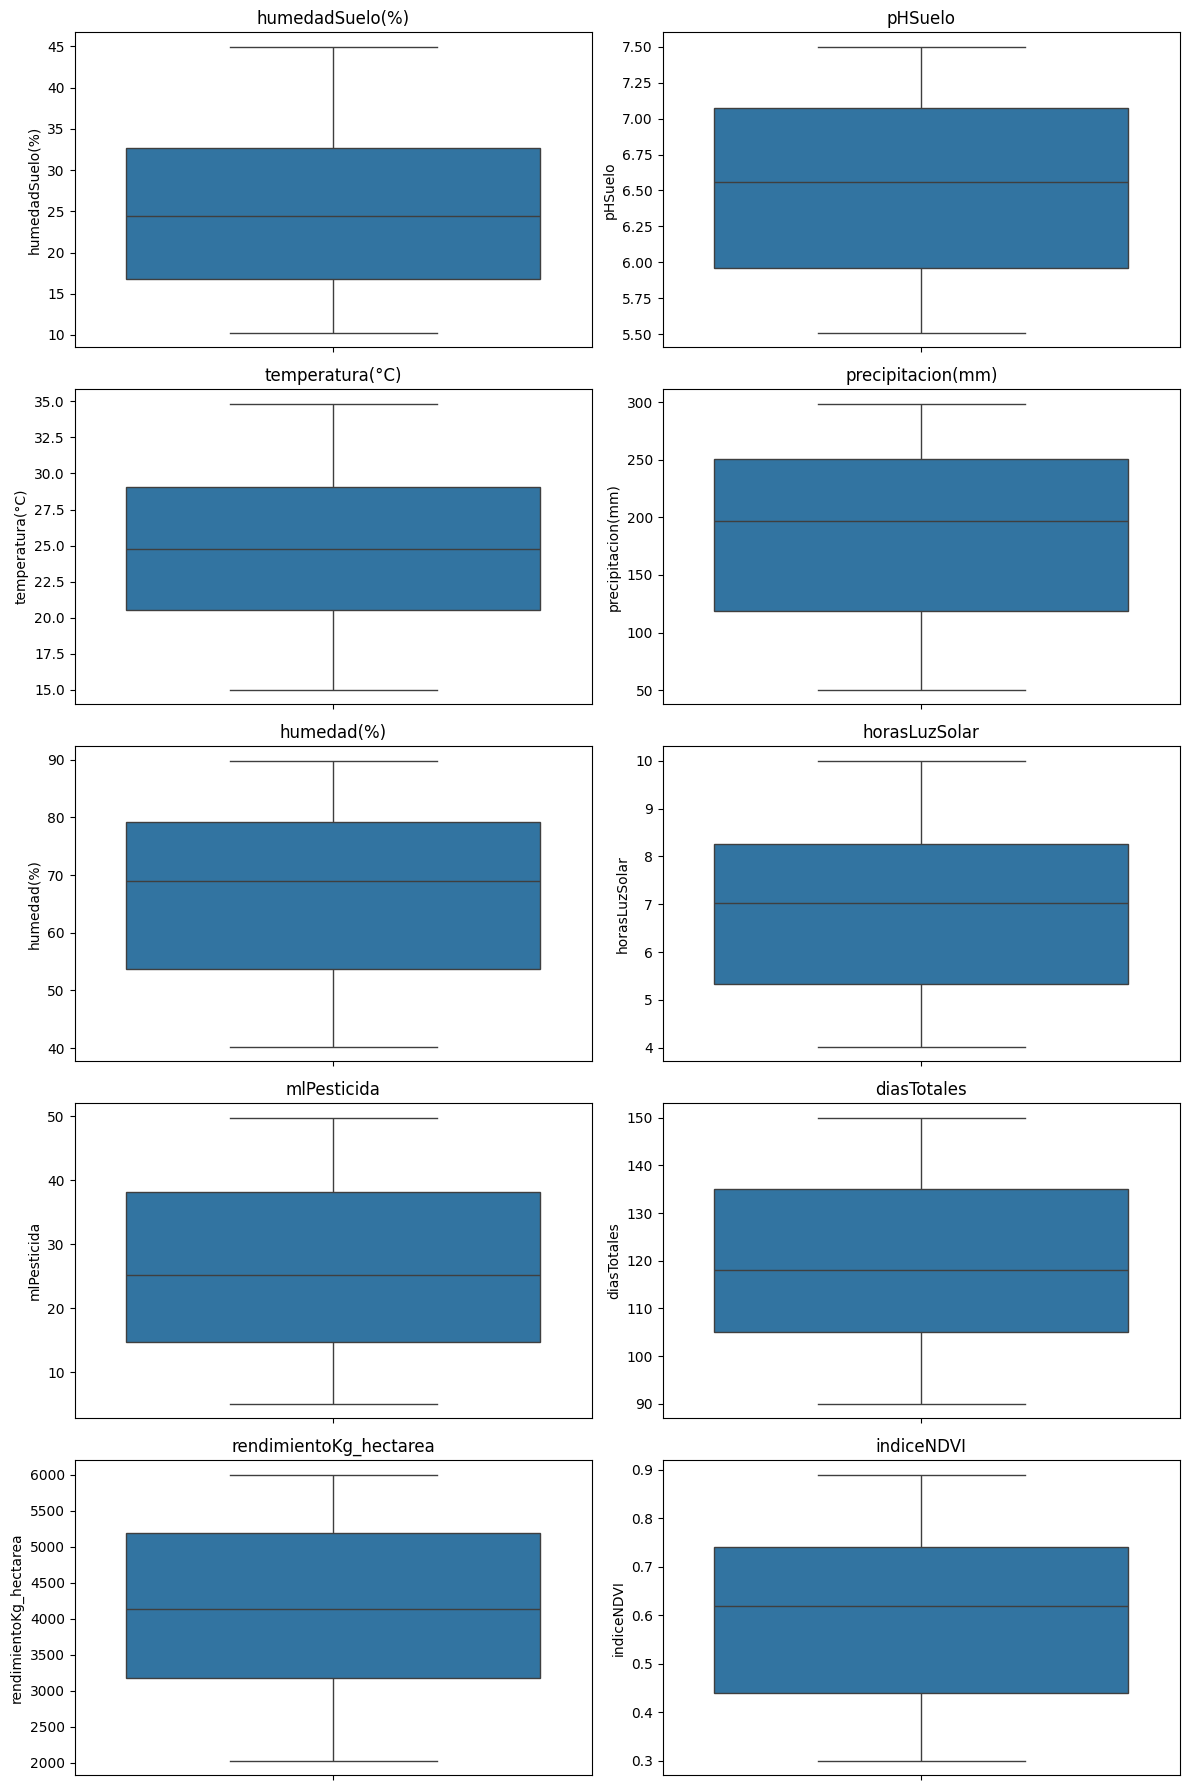

In [315]:
# Definimos el layout → 5 filas x 2 columnas = 10 subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 18))

# Aplanamos la grilla de ejes
axes = axes.flatten()

# Iteramos
for i, col in enumerate(cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

# Ajustamos diseño
plt.tight_layout()
plt.show()

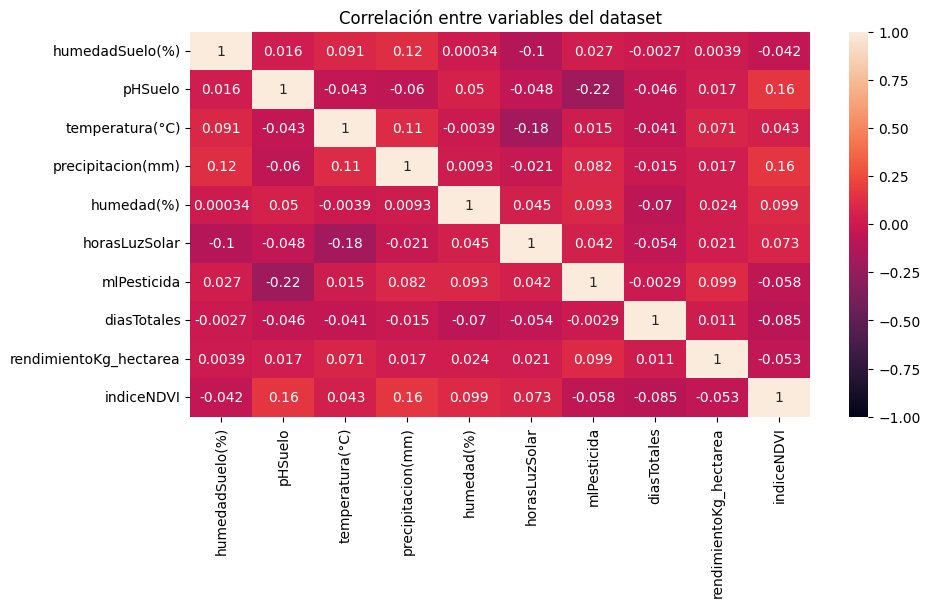

In [316]:
#Selección de columnas númericas
cols = ['humedadSuelo(%)', 'pHSuelo', 'temperatura(°C)','precipitacion(mm)', 'humedad(%)', 'horasLuzSolar', 
'mlPesticida', 'diasTotales', 'rendimientoKg_hectarea', 'indiceNDVI']

plt.figure(figsize=(10,5))
sns.heatmap(df[cols].corr(), vmin=-1, vmax=1, annot=True)
plt.title('Correlación entre variables del dataset')
plt.show()

**Codificación de variables catgorícas**

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163 entries, 2 to 309
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tipoCultivo                163 non-null    object 
 1   humedadSuelo(%)            163 non-null    float64
 2   pHSuelo                    163 non-null    float64
 3   temperatura(°C)            163 non-null    float64
 4   precipitacion(mm)          163 non-null    float64
 5   humedad(%)                 163 non-null    float64
 6   horasLuzSolar              163 non-null    float64
 7   tipoRiego                  163 non-null    object 
 8   tipoFertilizante           163 non-null    object 
 9   mlPesticida                163 non-null    float64
 10  diasTotales                163 non-null    int64  
 11  rendimientoKg_hectarea     163 non-null    float64
 12  indiceNDVI                 163 non-null    float64
 13  estadoEnfermedadesCultivo  163 non-null    object 
dtyp

In [318]:
df['estadoEnfermedadesCultivo'].value_counts()

estadoEnfermedadesCultivo
Leve        58
Moderate    53
Severo      52
Name: count, dtype: int64

In [319]:
df = pd.get_dummies(data=df, columns=['tipoRiego', 'tipoFertilizante', 'estadoEnfermedadesCultivo'], drop_first=True)

df

,tipoCultivo,humedadSuelo(%),pHSuelo,temperatura(°C),precipitacion(mm),humedad(%),horasLuzSolar,mlPesticida,diasTotales,rendimientoKg_hectarea,indiceNDVI,tipoRiego_Goteo,tipoRiego_Manual,tipoFertilizante_Mixto,tipoFertilizante_Organico,estadoEnfermedadesCultivo_Moderate,estadoEnfermedadesCultivo_Severo
2,Trigo,29.32,7.16,27.37,265.43,68.87,8.23,15.26,144,2931.16,0.80,True,False,True,False,False,False
5,Maiz,27.10,5.72,22.26,296.33,80.34,5.44,47.61,121,5264.09,0.70,False,False,True,False,False,False
6,Soja,40.54,6.35,19.24,184.82,76.50,5.21,49.78,118,5598.46,0.50,False,True,False,False,False,False
7,Trigo,13.39,6.36,23.47,166.76,76.45,8.04,23.12,145,2437.08,0.55,True,False,False,True,True,False
9,Soja,12.80,5.87,26.90,218.80,51.76,4.72,31.75,116,4629.49,0.42,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,Maiz,29.30,6.71,32.93,92.69,87.33,6.34,35.50,128,5528.08,0.31,False,True,True,False,False,False
299,Maiz,26.91,6.03,15.04,207.79,59.68,9.54,45.16,112,2023.56,0.30,True,False,False,False,False,False
303,Trigo,31.58,5.68,16.02,151.82,55.32,7.80,20.13,122,3708.29,0.47,False,False,False,True,True,False
306,Maiz,32.14,7.44,21.49,286.61,84.20,5.58,45.43,93,4503.82,0.88,False,False,False,False,False,False


In [320]:
df['mas_120_dias'] = df['diasTotales'].apply(lambda x: True if x > 120 else False)
df.drop(columns='diasTotales', inplace=True)

df

,tipoCultivo,humedadSuelo(%),pHSuelo,temperatura(°C),precipitacion(mm),humedad(%),horasLuzSolar,mlPesticida,rendimientoKg_hectarea,indiceNDVI,tipoRiego_Goteo,tipoRiego_Manual,tipoFertilizante_Mixto,tipoFertilizante_Organico,estadoEnfermedadesCultivo_Moderate,estadoEnfermedadesCultivo_Severo,mas_120_dias
2,Trigo,29.32,7.16,27.37,265.43,68.87,8.23,15.26,2931.16,0.80,True,False,True,False,False,False,True
5,Maiz,27.10,5.72,22.26,296.33,80.34,5.44,47.61,5264.09,0.70,False,False,True,False,False,False,True
6,Soja,40.54,6.35,19.24,184.82,76.50,5.21,49.78,5598.46,0.50,False,True,False,False,False,False,False
7,Trigo,13.39,6.36,23.47,166.76,76.45,8.04,23.12,2437.08,0.55,True,False,False,True,True,False,True
9,Soja,12.80,5.87,26.90,218.80,51.76,4.72,31.75,4629.49,0.42,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,Maiz,29.30,6.71,32.93,92.69,87.33,6.34,35.50,5528.08,0.31,False,True,True,False,False,False,True
299,Maiz,26.91,6.03,15.04,207.79,59.68,9.54,45.16,2023.56,0.30,True,False,False,False,False,False,False
303,Trigo,31.58,5.68,16.02,151.82,55.32,7.80,20.13,3708.29,0.47,False,False,False,True,True,False,True
306,Maiz,32.14,7.44,21.49,286.61,84.20,5.58,45.43,4503.82,0.88,False,False,False,False,False,False,False


**Normalización de las variables**

In [321]:
X = df.drop(columns=['tipoCultivo'])
y = df['tipoCultivo']

scaler = StandardScaler().set_output(transform="pandas")
df_std = scaler.fit_transform(X)
df_std

,humedadSuelo(%),pHSuelo,temperatura(°C),precipitacion(mm),humedad(%),horasLuzSolar,mlPesticida,rendimientoKg_hectarea,indiceNDVI,tipoRiego_Goteo,tipoRiego_Manual,tipoFertilizante_Mixto,tipoFertilizante_Organico,estadoEnfermedadesCultivo_Moderate,estadoEnfermedadesCultivo_Severo,mas_120_dias
2,0.394017,1.040927,0.468253,1.084461,0.129232,0.715899,-0.807933,-1.060408,1.132157,1.525297,-0.733305,1.420746,-0.694131,-0.694131,-0.684448,1.069924
5,0.173440,-1.323141,-0.511037,1.501523,0.951804,-0.874106,1.589491,0.961703,0.569187,-0.655610,-0.733305,1.420746,-0.694131,-0.694131,-0.684448,1.069924
6,1.508827,-0.288861,-1.089796,-0.003546,0.676418,-1.005182,1.750307,1.251525,-0.556753,-0.655610,1.363690,-0.703856,-0.694131,-0.694131,-0.684448,-0.934646
7,-1.188775,-0.272444,-0.279151,-0.247304,0.672833,0.607619,-0.225437,-1.488661,-0.275268,1.525297,-0.733305,-0.703856,1.440650,1.440650,-0.684448,1.069924
9,-1.247397,-1.076884,0.378181,0.455088,-1.097812,-1.284430,0.414123,0.411652,-1.007130,-0.655610,-0.733305,1.420746,-0.694131,1.440650,-0.684448,-0.934646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.392030,0.302156,1.533782,-1.247039,1.453092,-0.361201,0.692032,1.190522,-1.626397,-0.655610,1.363690,1.420746,-0.694131,-0.694131,-0.684448,1.069924
299,0.154561,-0.814210,-1.894692,0.306484,-0.529829,1.462461,1.407924,-1.847087,-1.682694,1.525297,-0.733305,-0.703856,-0.694131,-0.694131,-0.684448,-0.934646
303,0.618569,-1.388809,-1.706883,-0.448952,-0.842507,0.470845,-0.447022,-0.386816,-0.725645,-0.655610,-0.733305,-0.703856,1.440650,1.440650,-0.684448,1.069924
306,0.674210,1.500607,-0.658602,1.370331,1.228624,-0.794321,1.427933,0.302725,1.582534,-0.655610,-0.733305,-0.703856,-0.694131,-0.694131,-0.684448,-0.934646


In [322]:
y[y.isna()]

Series([], Name: tipoCultivo, dtype: object)

In [323]:
X

,humedadSuelo(%),pHSuelo,temperatura(°C),precipitacion(mm),humedad(%),horasLuzSolar,mlPesticida,rendimientoKg_hectarea,indiceNDVI,tipoRiego_Goteo,tipoRiego_Manual,tipoFertilizante_Mixto,tipoFertilizante_Organico,estadoEnfermedadesCultivo_Moderate,estadoEnfermedadesCultivo_Severo,mas_120_dias
2,29.32,7.16,27.37,265.43,68.87,8.23,15.26,2931.16,0.80,True,False,True,False,False,False,True
5,27.10,5.72,22.26,296.33,80.34,5.44,47.61,5264.09,0.70,False,False,True,False,False,False,True
6,40.54,6.35,19.24,184.82,76.50,5.21,49.78,5598.46,0.50,False,True,False,False,False,False,False
7,13.39,6.36,23.47,166.76,76.45,8.04,23.12,2437.08,0.55,True,False,False,True,True,False,True
9,12.80,5.87,26.90,218.80,51.76,4.72,31.75,4629.49,0.42,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,29.30,6.71,32.93,92.69,87.33,6.34,35.50,5528.08,0.31,False,True,True,False,False,False,True
299,26.91,6.03,15.04,207.79,59.68,9.54,45.16,2023.56,0.30,True,False,False,False,False,False,False
303,31.58,5.68,16.02,151.82,55.32,7.80,20.13,3708.29,0.47,False,False,False,True,True,False,True
306,32.14,7.44,21.49,286.61,84.20,5.58,45.43,4503.82,0.88,False,False,False,False,False,False,False


# PCA

In [324]:
# Obtener todas las componentes principales
pca = PCA(n_components=X.shape[1])

pca_features = pca.fit_transform(df_std)

# PC dataframe
pca_df = pd.DataFrame(
    data=pca_features,
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9',
             'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16' ])
pca_df['tipoCultivo'] = df['tipoCultivo']

In [325]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,tipoCultivo
0,-0.068315,-0.430961,2.448585,0.453308,0.778546,-0.079128,-1.411301,0.213420,1.245448,0.277594,0.053400,1.255125,-0.947609,-0.145656,0.614417,-0.371073,NaN
1,0.959151,0.744856,0.500574,-1.467113,1.723245,1.368822,0.272948,0.886305,1.089267,0.620799,-1.222328,-0.478189,0.494090,-0.876869,-0.194026,-1.174045,NaN
2,1.174755,1.036803,-1.254872,-0.277938,0.499558,0.875947,0.908315,-0.935845,-0.641523,2.143201,0.111406,-1.156677,0.519555,-1.225925,0.222888,0.209024,Trigo
3,-2.349818,-1.389282,-0.859643,-0.040962,-0.202887,-0.023863,-0.727274,1.701050,0.814356,-0.045609,0.134839,0.551898,-0.767000,0.610383,0.386530,0.399999,NaN
4,0.977342,-1.927715,-0.310204,-1.930395,1.191368,-0.479648,0.720434,-0.087239,-0.419969,-0.951837,-0.567308,-1.108337,0.236096,0.616035,-0.269047,-0.592613,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,1.989092,0.940769,-0.203972,-1.189106,-0.576969,-0.113469,2.352749,0.486844,0.094168,0.827523,0.174285,1.066409,-1.378714,-0.320266,1.128849,-0.516197,NaN
159,-2.028187,-0.451778,-0.130169,-1.889532,0.120233,1.032335,-2.187671,-0.779432,-1.486649,1.264580,0.721080,-0.722740,-0.905222,-0.662839,0.395700,0.188272,Trigo
160,-1.074850,-1.057926,-2.315932,-0.497614,-1.032655,-0.040340,-1.294190,0.207822,0.241152,0.355028,-1.240296,0.466718,0.573688,-0.057548,-0.904269,-0.835939,NaN
161,0.201653,0.484339,0.985710,1.645693,1.595212,1.111281,0.406271,0.040438,0.215286,1.400133,0.534760,-1.700272,0.060210,-1.151800,-0.872823,-0.620387,NaN


In [326]:
pd.DataFrame(pca.components_,
             columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9',
                     'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16'],
             index=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9','X10',
                    'X11', 'X12', 'X13', 'X14', 'X15', 'X16'])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
X1,0.212903,0.010127,0.211342,0.053591,-0.113253,-0.290620,-0.027725,-0.006466,0.089247,-0.478627,0.505708,0.340706,-0.432702,0.053767,-0.047951,0.087434
X2,0.252761,-0.039936,0.161753,0.185378,0.166549,0.075340,0.250342,0.192328,-0.066145,-0.080113,0.141937,-0.189286,0.119543,-0.533645,0.570553,0.222588
X3,-0.138065,0.337462,-0.030225,0.063742,0.136067,0.037164,-0.206953,-0.074330,0.268479,0.225638,-0.311094,0.475565,-0.388995,-0.367157,0.222867,-0.110020
X4,0.182976,0.468219,0.092774,0.149932,0.198114,0.051424,-0.351140,-0.062262,0.482990,-0.189649,0.158931,-0.315436,0.320129,0.038055,-0.078189,-0.207570
X5,0.173504,-0.235373,0.400726,0.580559,0.079760,-0.172220,0.303593,0.091547,0.198650,0.258487,-0.211389,0.014804,-0.071483,0.150238,-0.187401,-0.257513
X6,-0.242430,-0.191874,-0.318780,0.091640,0.273697,0.556271,0.370184,0.063154,0.350538,-0.198067,0.215152,0.049169,-0.149956,-0.026166,-0.180243,-0.050469
X7,-0.246213,0.160690,0.266703,-0.360942,0.405940,-0.166635,0.091993,0.666020,-0.097870,-0.091825,-0.032296,0.060308,0.026755,0.070363,-0.062029,-0.188000
X8,-0.208138,-0.188336,0.122397,-0.096015,0.579194,-0.317635,0.068604,-0.509264,0.116892,-0.133566,-0.121473,0.070811,0.159681,0.112998,0.087726,0.315214
X9,-0.183697,0.238623,-0.088830,0.171562,-0.163967,-0.156930,0.067397,0.312952,0.295835,0.244679,0.053173,0.004282,0.064273,0.097809,-0.148640,0.729365
X10,0.594167,0.258311,-0.467898,-0.079884,0.367759,-0.147545,0.246627,-0.010214,-0.162677,0.247266,0.072503,0.101577,-0.066306,0.124081,-0.118367,0.001695


componentes principales?

In [327]:
# Creamos función para acumular la varianza
def acumular(numbers):
     sum = 0
     var_c = []
     for num in numbers:
        sum += num
        var_c.append(sum)
     return var_c

In [328]:
var_c = acumular(pca.explained_variance_ratio_)
pca_rtd = pd.DataFrame({'Eigenvalues':pca.explained_variance_,
                        'Proporción de variancia explicada':pca.explained_variance_ratio_,
                        'Proporción acumulado de variancia explicada': var_c})
pca_rtd

,Eigenvalues,Proporción de variancia explicada,Proporción acumulado de variancia explicada
0,1.736272,0.107851,0.107851
1,1.647325,0.102326,0.210177
2,1.536375,0.095434,0.305612
3,1.266016,0.078641,0.384252
4,1.252107,0.077777,0.462029
5,1.195375,0.074253,0.536282
6,1.038544,0.064511,0.600792
7,1.002932,0.062299,0.663091
8,0.969880,0.060246,0.723337
9,0.946158,0.058772,0.782109


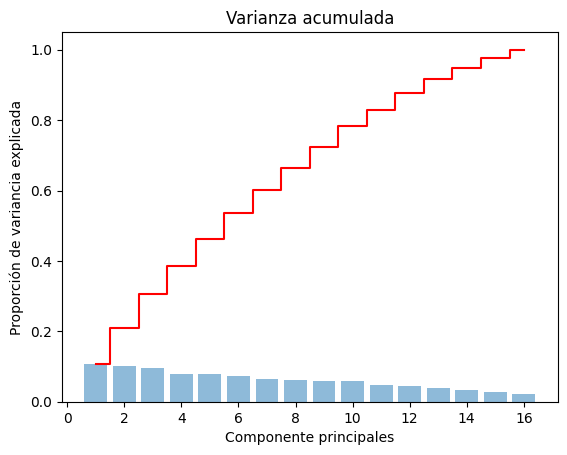

In [329]:
plt.bar(range(1,17), pca.explained_variance_ratio_,
        alpha=0.5,
        align='center')
plt.step(range(1,17), np.cumsum(pca.explained_variance_ratio_),
         where='mid',
         color='red')
plt.title('Varianza acumulada')
plt.ylabel('Proporción de variancia explicada')
plt.xlabel('Componente principales')
plt.show()

In [330]:
pca_filtrado = pca_df[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'tipoCultivo']]

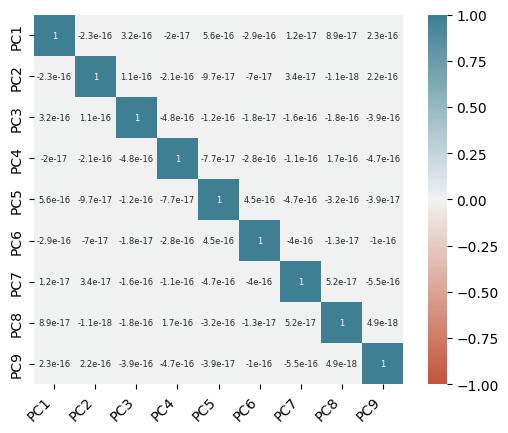

In [331]:
#elegimos las 10 primeras variables que suman mas del 75%

corr = pca_df[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']].corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

In [332]:
features = pca_filtrado.drop(columns=['tipoCultivo']).columns.to_list()

unique_tipoCultivo = pca_filtrado['tipoCultivo'].unique()
num_colors = len(unique_tipoCultivo)
color_palette = plt.get_cmap('tab20', num_colors)

tipoCultivo_color_map = {cultivo: mcolors.to_hex(color_palette(i)) for i,
                       cultivo in enumerate(unique_tipoCultivo)}

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
fig = px.scatter(pca_features, x=0, y=1, color = pca_filtrado["tipoCultivo"],
                 labels={'color': 'tipoCultivo'},
                 color_discrete_map=tipoCultivo_color_map,
                 title="Distribución de las tipoCultivoes en 2 dimensiones")

fig.show()

In [333]:
fig = px.scatter_3d(pca_features, x=0, y=1, z=2,
              color=pca_filtrado["tipoCultivo"],  labels={'color': 'tipoCultivo'},
              color_discrete_map=tipoCultivo_color_map,
              title="Distribución de las tipoCultivoes en 3 dimensiones")
fig.show()

# ISOMAP

In [334]:
isomap = Isomap(n_neighbors=100, n_components=2) #preguntar numero componentes
X_reduced = isomap.fit_transform(df_std)
X_reduced

array([[ 1.32273711e-01, -6.00170236e-01],
       [ 1.00558247e+00,  1.18103314e+00],
       [ 6.67183391e-01,  1.73629353e+00],
       [-2.43328201e+00, -3.27175704e+00],
       [ 2.51493932e+00, -2.13053818e+00],
       [-7.54979430e-01, -7.90006546e-01],
       [-3.53656746e+00,  2.50841755e-01],
       [ 4.67435481e-01,  2.50652205e-01],
       [ 1.54574571e+00, -1.15634963e+00],
       [-3.23652026e+00,  1.34597611e+00],
       [-2.14903754e-01,  4.81082717e+00],
       [-1.26572530e+00,  2.45799386e+00],
       [ 7.24918354e-01,  2.01396183e+00],
       [-2.47488125e-01,  1.94489782e+00],
       [-8.58975059e-01, -2.74585205e+00],
       [ 5.93645912e-02, -3.91756754e+00],
       [-8.28932506e-01,  1.07396535e+00],
       [ 4.11974871e-01,  3.63559451e+00],
       [ 1.52099034e+00, -2.90503171e+00],
       [ 1.30989309e+00, -4.55738248e-01],
       [-2.74544295e-01, -2.19934414e+00],
       [-5.69321892e-01, -1.33740884e+00],
       [ 2.70623674e-01,  2.72723899e-01],
       [ 5.

In [335]:
df_isomap = pd.DataFrame(X_reduced, columns=['PC1', 'PC2'])
df_isomap['tipoCultivo'] = y

df_isomap

,PC1,PC2,tipoCultivo
0,0.132274,-0.600170,NaN
1,1.005582,1.181033,NaN
2,0.667183,1.736294,Trigo
3,-2.433282,-3.271757,NaN
4,2.514939,-2.130538,NaN
...,...,...,...
158,2.766581,2.041787,NaN
159,-2.780438,-2.016624,Trigo
160,-0.947449,-2.283035,NaN
161,0.039763,0.580975,NaN


In [342]:
y.info()

<class 'pandas.core.series.Series'>
Index: 163 entries, 2 to 309
Series name: tipoCultivo
Non-Null Count  Dtype 
--------------  ----- 
163 non-null    object
dtypes: object(1)
memory usage: 6.6+ KB


In [339]:
df_isomap[df_isomap['tipoCultivo'].isna()]

,PC1,PC2,tipoCultivo
0,0.132274,-0.600170,NaN
1,1.005582,1.181033,NaN
3,-2.433282,-3.271757,NaN
4,2.514939,-2.130538,NaN
8,1.545746,-1.156350,NaN
...,...,...,...
156,-0.091924,-0.072741,NaN
158,2.766581,2.041787,NaN
160,-0.947449,-2.283035,NaN
161,0.039763,0.580975,NaN


In [337]:
fig_isomap_2d = px.scatter(df_isomap, x='PC1', y='PC2', color = y,
                    labels = {'color':'Tipo cultivo', 0:'PC1',1:'PC2'},
                    title='ISOMAP')
fig_isomap_2d.show()

In [338]:
from sklearn.manifold import Isomap
import pandas as pd
import plotly.express as px

#Definir combinaciones de vecinos y componentes
vecinos_list = [5, 10, 30, 100]
componentes_list = [2, 3, 5, 10]

for n in vecinos_list:
    for d in componentes_list:
        isomap = Isomap(n_neighbors=n, n_components=d)
        X_reduced = isomap.fit_transform(df_std)

        # Siempre graficamos solo las dos primeras dimensiones
        df_isomap = pd.DataFrame(X_reduced[:, :2], columns=['PC1', 'PC2'])
        df_isomap['tipoCultivo'] = y

        fig = px.scatter(
            df_isomap, x='PC1', y='PC2', color=y,
            labels={'color': 'tipoCultivo', 0: 'PC1', 1: 'PC2'},
            title=f'ISOMAP con {n} vecinos y {d} componentes (mostrando PC1 y PC2)'
        )
        fig.show()